In [39]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
from tabulate import tabulate
import math
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Lese die CSV-Datei ein
# Ersetze 'sails_results.csv' durch den Pfad zu deiner CSV-Datei
df1 = pd.read_csv('sa_ls_results.csv')
df2 = pd.read_csv('sa_ls_results_2.csv')

frames= [df1, df2]

df = pd.concat(frames)

# Round 'RunTime' to the nearest integer
df['RunTime'] = df['RunTime'].round(2).astype(int)

# Convert 'WaitingTime' to integers as it only has whole numbers
df['WaitingTime'] = df['WaitingTime'].astype(int)

# Rename specific columns
df = df.rename(columns={
    'min_temperature': 'End Temperature',
    'temp_decrease_factor': 'Decrease Factor',
    'start_temperature': 'Start Temperature',
    # Add more columns to rename as needed
})

#table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
df.head(3)

,Instance,Start Temperature,End Temperature,Decrease Factor,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
0,7_2_1,100,1.000000e-20,0.95,762,3530,272,121,900,900
1,7_2_1,100,1.000000e-20,0.99,761,3879,272,24,915,900
2,7_2_1,100,1.000000e-40,0.95,765,3675,272,75,903,900


##### Calculale RPD

In [40]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance = df.groupby('Instance')['TotalProfit'].transform('max')

# Calculate RPD
df['RPD'] = ((max_profit_per_instance - df['TotalProfit']) / max_profit_per_instance) * 100

# Function to calculate iterations based on start temperature, min temperature, and temp decrease factor
def calculate_iterations(T_start, T_min, alpha):
    # Check if alpha is less than 1 to avoid errors
    if alpha < 1:
        iterations = math.log(T_min / T_start) / math.log(alpha)
        return int(iterations)
    else:
        return None  # Return None or handle cases where alpha is not less than 1

# Apply the formula to each row of the DataFrame
df['SA_Runs'] = df.apply(
    lambda row: calculate_iterations(row['Start Temperature'], row['End Temperature'], row['Decrease Factor']), axis=1)

In [41]:
df

,Instance,Start Temperature,End Temperature,Decrease Factor,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit,RPD,SA_Runs
0,7_2_1,100,1.000000e-20,0.95,762,3530,272,121,900,900,1.677419,987
1,7_2_1,100,1.000000e-20,0.99,761,3879,272,24,915,900,1.806452,5040
2,7_2_1,100,1.000000e-40,0.95,765,3675,272,75,903,900,1.290323,1885
3,7_2_1,100,1.000000e-40,0.99,762,3407,272,15,958,900,1.677419,9622
4,7_2_1,1000,1.000000e-20,0.95,775,2691,275,83,905,900,0.000000,1032
...,...,...,...,...,...,...,...,...,...,...,...,...
40,7_8_1,10000,1.000000e-10,0.90,2168,9040,932,784,902,900,0.459137,305
41,7_8_1,10000,1.000000e-10,0.95,2166,10140,934,288,900,900,0.550964,628
42,7_8_1,10000,1.000000e-10,0.99,2150,16009,918,16,1004,900,1.285583,3207
43,7_8_1,10000,1.000000e-20,0.90,2169,10371,938,448,902,900,0.413223,524


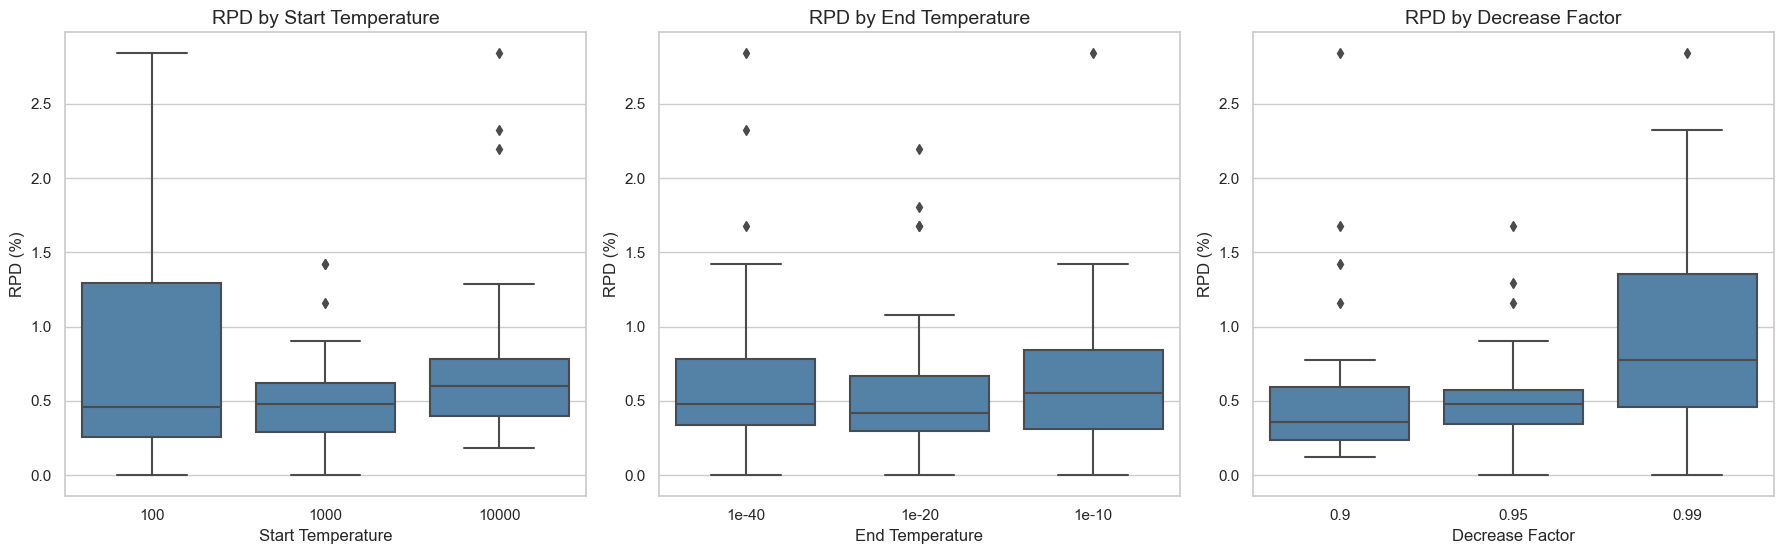

In [42]:
#Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Start Temperature', 'End Temperature', 'Decrease Factor']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6))

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=False, meanline=False,
                meanprops={"color": "red", "ls": "--", "lw": 2},
                color=boxplot_color, ax=axes[i])  # Set consistent color
    
    # Set titles for each subplot
    axes[i].set_title(f'RPD by {param}', fontsize=14)
    axes[i].set_xlabel(param, fontsize=12)
    axes[i].set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_scientific.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()